In [7]:
import pandas as pd
import numpy as np
#!pip install annoy
import annoy
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pd.set_option('display.max_columns',100)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
customers = pd.read_csv('/content/drive/MyDrive/customers.csv')
transactions_train = pd.read_csv('/content/drive/MyDrive/transactions_train.csv')
articles = pd.read_csv('/content/drive/MyDrive/articles.csv')

In [14]:
articles.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [15]:
dims = [
    'prod_name',
    'product_type_no',
    'product_group_name',
    'graphical_appearance_no',
    'colour_group_code',
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_name',
    'index_group_no',
    'section_no',
    'garment_group_no'
]

In [16]:
articles.set_index('article_id',inplace=True)

In [17]:
prod_name_enc = LabelEncoder()
group_name_enc = LabelEncoder()
index_enc = LabelEncoder()

articles['prod_name'] = prod_name_enc.fit_transform(articles['prod_name'].values.reshape(-1,1))
articles['product_group_name'] = group_name_enc.fit_transform(articles['product_group_name'].values.reshape(-1,1))
articles['index_name'] = index_enc.fit_transform(articles['index_name'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
vector = np.ascontiguousarray(articles[dims].values, dtype=np.float32)
items = np.array(articles.index)

In [19]:
item_data = {"id":items,"vector":vector}

In [20]:
class AnnoyIndex():
    def __init__(self, vectors, labels):
        self.dimension = vectors.shape[1]
        self.vectors = vectors.astype('float32')
        self.labels = labels   
        self.search_in_x_trees = 8
   
    def build(self, number_of_trees=100):
        self.index = annoy.AnnoyIndex(self.dimension)
        for i, vec in enumerate(self.vectors):
            self.index.add_item(i, vec.tolist())
        self.index.build(number_of_trees)
        
    def query(self, vector, k=10):
        indices = self.index.get_nns_by_vector(
              vector.tolist(), 
              k, 
              search_k=self.search_in_x_trees)                                           
        return [self.labels[i] for i in indices]

In [21]:
index = AnnoyIndex(item_data['vector'],item_data['id'])
index.build(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  if __name__ == '__main__':


In [22]:
dd = {"item":[],"similar_items":[]}
for x in tqdm(range(len(item_data['vector']))):
    similar_items = index.query(item_data['vector'][x])
    dd['item'].append(item_data['id'][x])
    dd['similar_items'].append(similar_items)

  0%|          | 0/105542 [00:00<?, ?it/s]

In [23]:
item_similarities = pd.DataFrame(dd)

### Plot sample items

In [24]:
sample = list(item_similarities.sample(10)['item'])

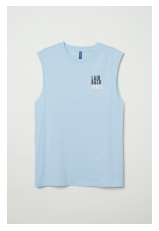

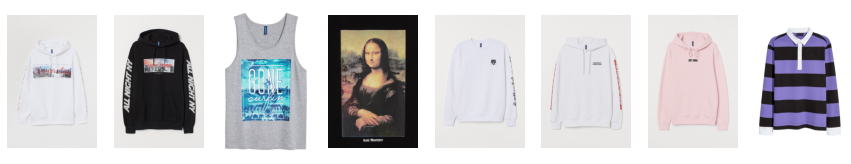

In [25]:
id = str(sample[0])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

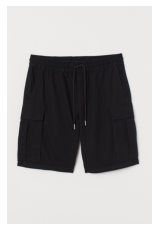

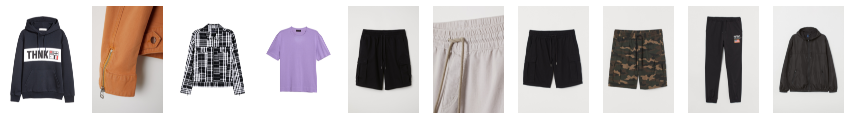

In [26]:
id = str(sample[1])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

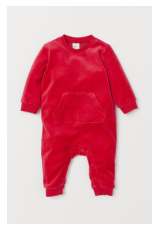

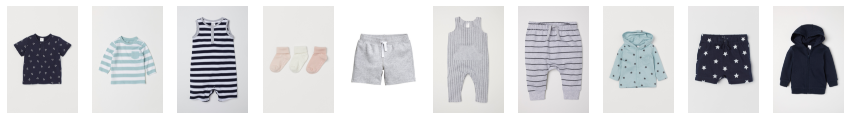

In [27]:
id = str(sample[2])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

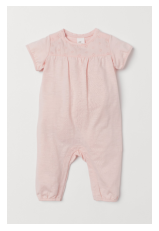

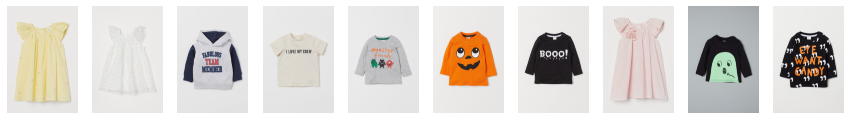

In [28]:
id = str(sample[3])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

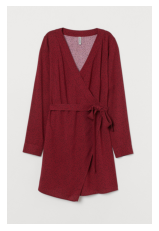

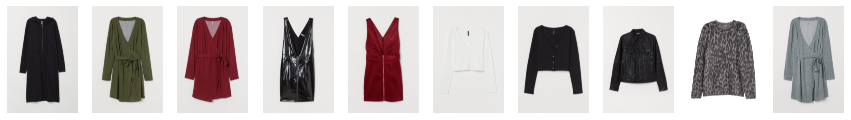

In [29]:
id = str(sample[4])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

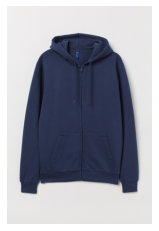

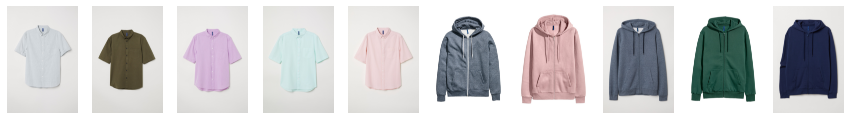

In [31]:
id = str(sample[5])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

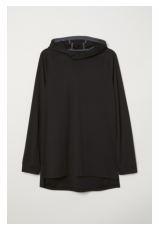

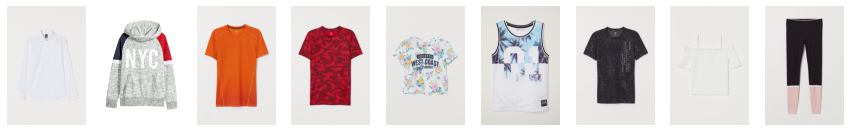

In [32]:
id = str(sample[6])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

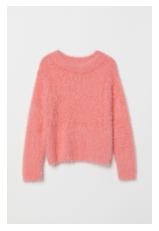

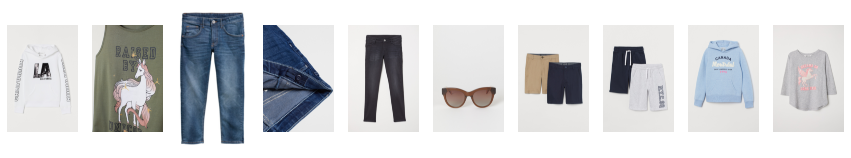

In [33]:
id = str(sample[7])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

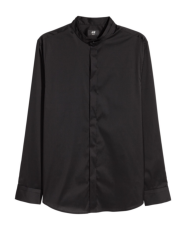

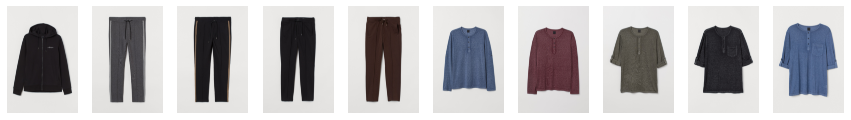

In [34]:
id = str(sample[8])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

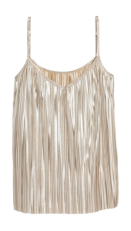

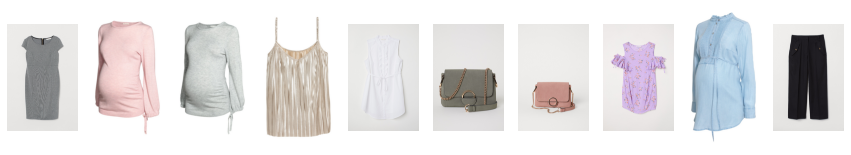

In [35]:
id = str(sample[9])
path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(id)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"/content/drive/MyDrive/images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()